In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import string
import spacy
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#Read the dataset
musk = pd.read_csv('Elon_musk.csv', encoding='latin-1')
musk.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
#Dropping the Unnamed Column
musk.drop(['Unnamed: 0'], axis =1, inplace = True)
musk.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [4]:
#Checking the shape of the dataset
musk.shape

(1999, 1)

#Text Preprocessing

In [5]:
#Removing extra spaces
musk = [Text.strip() for Text in musk.Text]
musk = [x for x in musk if x]
musk[0:15]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler']

In [6]:
#joining the data
text = " ".join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [7]:
#Removing the twitter Usernames
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tokens = tknzr.tokenize(text)
print(tokens[0:30])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing']


In [8]:
#Again joining the tokens
no_user_text = ' '.join(tokens)
no_user_text[0:50]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR i'

In [9]:
#Removing the punctuations
no_punc_text = no_user_text.translate(str.maketrans('','', string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [10]:
#Removing URLs
import re
no_url_text = re.sub(r'https\S+','', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [11]:
#Importing the nltk tool-kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
#Tokenizing the words
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url_text)
print(text_tokens[0:15])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you']


In [42]:
#Removing Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

sw = ['\x92', 'rt', 'I', 'U0001F923', 'haha', 'ye']
my_stop_words = stopwords.words('english')
my_stop_words.extend(sw)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
print(no_stop_tokens[0:30])

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought']


In [44]:
#Converting words to Lower Case
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[0:30])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought']


In [45]:
#Performing Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in lower_words]
print(stemmed_words[0:50])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'just', 'sent', 'just', 'agre']


In [46]:
!python -m spacy download en

2023-10-25 14:00:29.729292: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-25 14:00:29.729390: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-25 14:00:29.729441: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-25 14:00:31.259912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.4 MB/s eta 0:00:00
✔ Download and installation succe

In [47]:
nlp = spacy.load('en_core_web_sm')

In [48]:
doc = nlp(' '.join(lower_words))
print(doc[0:30])

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought


In [49]:
#Lemmatizing
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:30])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought']


#Feature Extraction

##Count Vectorizer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tweets_cv = cv.fit_transform(lemmas)

In [51]:
print(cv.vocabulary_)

{'alien': 194, 'ray': 2348, 'trace': 3012, 'cyberpunk': 767, 'hdr': 1358, 'nextlevel': 1961, 'have': 1353, 'try': 3043, 'great': 1305, 'interview': 1557, 'doge': 890, 'underestimate': 3176, 'congratulation': 675, 'tesla': 2917, 'china': 584, 'amazing': 217, 'execution': 1057, 'last': 1641, 'year': 3392, 'now': 1989, 'next': 1960, 'even': 1031, 'happy': 1340, 'new': 1958, 'ox': 2090, 'frodo': 1207, 'underdoge': 3175, 'all': 197, 'thought': 2954, 'would': 3378, 'fail': 1091, 'himself': 1402, 'haha': 1328, 'thank': 2928, 'indeed': 1498, 'tweet': 3058, 'definitely': 804, 'represent': 2414, 'realworld': 2363, 'time': 2970, 'allocation': 199, 'the': 2933, 'entertaining': 1001, 'outcome': 2069, 'likely': 1696, 'just': 1599, 'send': 2557, 'agree': 179, 'clubhouse': 613, 'it': 1576, 'get': 1266, 'real': 2358, 'buy': 502, 'dogecoin': 892, 'lil': 1697, 'toddler': 2982, 'hodler': 1408, 'he': 1359, 'issue': 1575, 'sentencing': 2562, 'seem': 2549, 'bit': 418, 'high': 1393, 'fix': 1152, 'please': 218

In [52]:
pd.DataFrame(cv.vocabulary_, columns = cv.vocabulary_.keys(), index = [0]).T

,0
alien,194
ray,2348
trace,3012
cyberpunk,767
hdr,1358
...,...
click,606
samwise,2503
gamgee,1240
altho,209


In [53]:
pd.DataFrame.from_records([cv.vocabulary_]).T.sort_values(0, ascending=False).head()

,0
ðogecoin,3411
zone,3410
zon,3409
zip,3408
zero,3407


In [54]:
print(cv.get_feature_names_out()[50:100])
print(tweets_cv.toarray()[50:100])

['250kw' '25gunsteslacom' '25k' '25th' '28' '28th' '29' '2k' '2nd' '2v'
 '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800' '394'
 '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445' '448'
 '4530' '4680' '479000' '48' '4d' '4th' '50' '50000' '50k' '60' '60000'
 '65' '69420' '6f' '6k' '727']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##Introducing Bigrams and Trigrams

In [55]:
cv_ngrams_range = CountVectorizer(analyzer = 'word', ngram_range = (1,3), max_features=100)
bow_ngram_matrix = cv_ngrams_range.fit_transform(lemmas)

In [56]:
print(cv_ngrams_range.get_feature_names_out()[50:100])
print(bow_ngram_matrix.toarray()[50:100])

['next' 'no' 'not' 'one' 'part' 'people' 'point' 'pretty' 'probably'
 'production' 'right' 'rocket' 'rt' 'say' 'seem' 'soon' 'space' 'spacex'
 'starlink' 'starship' 'start' 'still' 'super' 'sure' 'take' 'tesla'
 'test' 'thank' 'that' 'the' 'there' 'they' 'think' 'this' 'time' 'true'
 'try' 'ufe0f' 'use' 'way' 'we' 'week' 'well' 'will' 'work' 'would' 'yeah'
 'year' 'yes' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##Tfidf Vectorizer

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(norm='l2', analyzer = 'word', ngram_range = (1,3), max_features = 500)
tfidf_matrix = tfidf.fit_transform(lemmas)

In [58]:
print(tfidf.get_feature_names_out()[50:100])
print(tfidf_matrix.toarray()[50:100])

['beta' 'big' 'bit' 'boca' 'body' 'booster' 'brain' 'bring' 'bs' 'build'
 'burn' 'but' 'buy' 'cake' 'call' 'camera' 'can' 'car' 'cargo' 'catch'
 'cell' 'ch4' 'chance' 'change' 'china' 'civilization' 'close' 'cold'
 'color' 'come' 'company' 'complete' 'computer' 'confirm' 'congratulation'
 'control' 'cool' 'cost' 'could' 'course' 'cov' 'crazy' 'create' 'crew'
 'critical' 'curevac' 'cyberpunk' 'cybertruck' 'datum' 'day']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##Wordcloud

In [59]:
#Creating user func to create wordcloud
def plot_cloud(wordcloud):
  plt.figure(figsize = (40,30))
  plt.imshow(wordcloud)
  plt.axis('off');

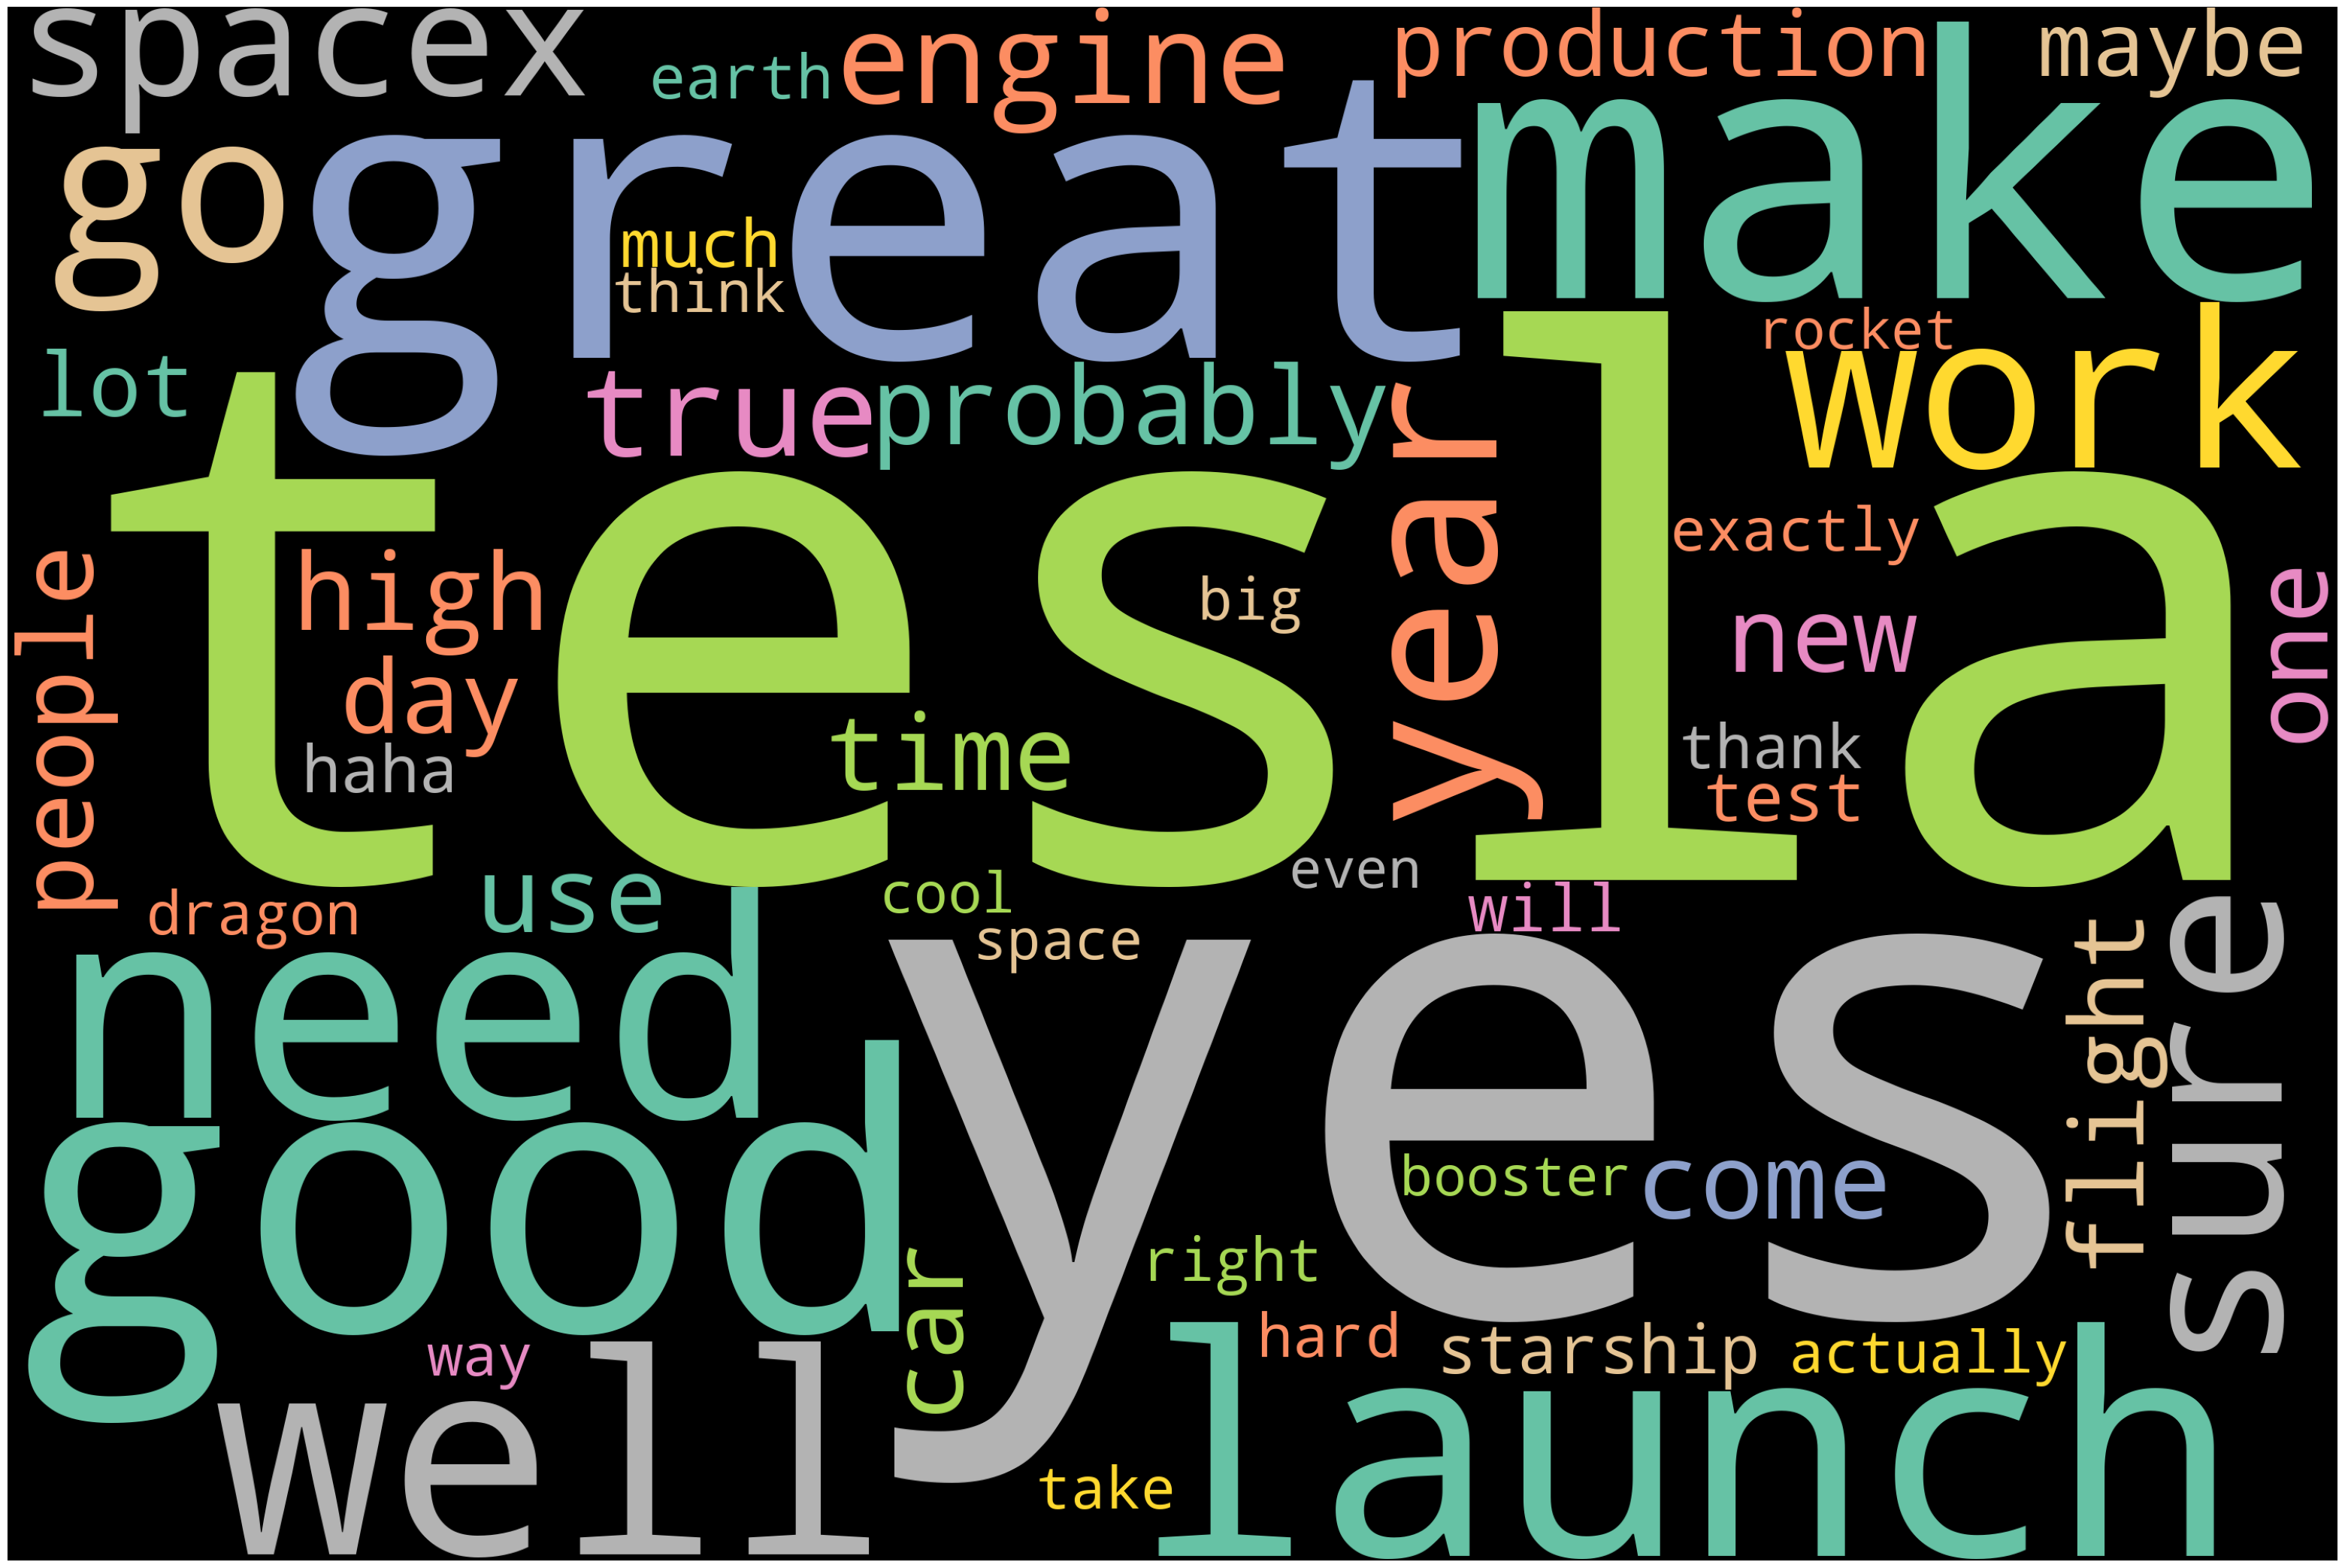

In [60]:
#Plotting a wordcloud
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud = WordCloud(width=3000, height=2000, background_color='black',
                      max_words = 50, colormap= "Set2", stopwords=stopwords).generate((' '.join(lemmas)))

plot_cloud(wordcloud)

#Named Entity Recognition (NER)

In [61]:
#POS (Parts Of Speech) Tagging
nlp = spacy.load('en_core_web_sm')

one_block = (' '.join(lemmas))
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style = 'ent', jupyter = True)

In [118]:
for token in doc_block[100:200]:
  print(token, token.pos_)

yes INTJ
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex VERB
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADP
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit NOUN
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin PROPN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow INTJ


#Setiment Analysis - Emotion Mining

In [156]:
#Converting to Sentence Tokens
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(' '.join(musk))
sentences[0:50]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [157]:
#Creating a dataframe for the sentences
sent_df = pd.DataFrame(sentences, columns=['Sentence'])
sent_df

,Sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [159]:
#Converting text to lower case in each sentence
sent_df = sent_df.applymap(lambda s : s.lower() if type(s) ==str else s)
sent_df.head()

,Sentence
0,@kunalb11 im an alien @id_aa_carmack ray trac...
1,have you tried it?
2,@joerogan @spotify great interview!
3,@gtera27 doge is underestimated @teslacn congr...
4,now on to the next for even more!!


In [160]:
#Removing User Name from each sentence
sent_df['Sentence'] = sent_df['Sentence'].apply(lambda x: ' '.join(tknzr.tokenize(x)))
sent_df

,Sentence
0,i  m an alien ray tracing on cyberpunk with h...
1,have you tried it ?
2,great interview !
3,doge is underestimated congratulations tesla c...
4,now on to the next for even more ! !
...,...
922,"not actually a payout , just a vesting of stoc..."
923,"it may never pay out , as the stock can  t b ..."
924,details aug 28 .
925,ai symbiosis while u wait there  s some of th...


In [162]:
#Removing Punctuations from each sentence
sent_df['Sentence'] = sent_df['Sentence'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
sent_df

,Sentence
0,i  m an alien ray tracing on cyberpunk with h...
1,have you tried it
2,great interview
3,doge is underestimated congratulations tesla c...
4,now on to the next for even more
...,...
922,not actually a payout just a vesting of stock...
923,it may never pay out as the stock can  t b h...
924,details aug 28
925,ai symbiosis while u wait there  s some of th...


In [164]:
#Removing URLs from each sentence
sent_df['Sentence'] = sent_df['Sentence'].apply(lambda x: re.sub(r'https\S+','', x))
sent_df

,Sentence
0,i  m an alien ray tracing on cyberpunk with h...
1,have you tried it
2,great interview
3,doge is underestimated congratulations tesla c...
4,now on to the next for even more
...,...
922,not actually a payout just a vesting of stock...
923,it may never pay out as the stock can  t b ...
924,details aug 28
925,ai symbiosis while u wait there  s some of th...


In [121]:
#Reading the Negative words text file and storing it as a list
with open('negative-words.txt', 'r', errors = 'ignore') as Neg:
  content = Neg.read()

neg_words = content.find('2-faced')
negative_words = content[neg_words:].split()

In [122]:
negative_words[0:20]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd']

In [123]:
#Reading the Positive words text file and storing it as a list
with open('positive-words.txt', 'r', errors = 'ignore') as Pos:
  content = Pos.read()

pos_words = content.find('a+')
positive_words = content[pos_words:].split()

In [124]:
positive_words[0:20]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately']

In [125]:
#Reading the Stopwords text file and storing it as a list
with open('stop.txt', 'r', errors='ignore') as file:
  content = file.read()
StopWords = content.split()

In [126]:
StopWords[0:20]

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along']

In [127]:
#Creating a user function that calculates sentiment score for each sentence
def sentiment_score(text):
  words = text.split()
  sent_score = 0
  for word in words:
    if word in StopWords:
      continue
    elif word in positive_words:
      sent_score +=1
    elif word in negative_words:
      sent_score -=1
  return sent_score

In [165]:
#Adding a column with Sentiment Score to the data frame
sent_df["Sentiment_Score"] = sent_df['Sentence'].apply(sentiment_score)
sent_df.sort_values(['Sentiment_Score'], ascending = False)

,Sentence,Sentiment_Score
105,was also thinking that spacex boca should hold...,6
655,it  s not useful for predicting the future n...,6
373,stop being a chad uh chad wtf einstein was gre...,5
744,if this rate of improvement tesla team is wor...,5
153,no but definitely this year good point intere...,4
...,...,...
650,very ba it  s too embarrassing just learned ...,-3
242,fate loves irony but hates hypocrisy rt boos...,-3
331,their main pcr search is for the n1 gene uniq...,-3
889,this is primarily an electrical electronic c...,-4


In [166]:
#The net sentiment score for the whole review
sent_df['Sentiment_Score'].sum()

282

In [167]:
#Counting the no. of words in each sentence
sent_df['word_count'] = sent_df['Sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       2
3      11
4       8
       ..
922    10
923    31
924     3
925    42
926    13
Name: word_count, Length: 927, dtype: int64

In [168]:
#Sorting the Sentiment Score
sent_df.sort_values('Sentiment_Score')

,Sentence,Sentiment_Score,word_count
354,rt crew dragon and falcon 9 in the hangar at...,-4,55
889,this is primarily an electrical electronic c...,-4,68
650,very ba it  s too embarrassing just learned ...,-3,55
242,fate loves irony but hates hypocrisy rt boos...,-3,39
331,their main pcr search is for the n1 gene uniq...,-3,24
...,...,...,...
153,no but definitely this year good point intere...,4,34
744,if this rate of improvement tesla team is wor...,5,56
373,stop being a chad uh chad wtf einstein was gre...,5,52
655,it  s not useful for predicting the future n...,6,92


In [169]:
#Reviews that are negative
sent_df[sent_df['Sentiment_Score']<=0]

,Sentence,Sentiment_Score,word_count
0,i  m an alien ray tracing on cyberpunk with h...,0,13
1,have you tried it,0,4
4,now on to the next for even more,0,8
6,frodo was the underdoge all thought he would...,-1,13
7,haha thanks indeed,0,3
...,...,...,...
921,everything we  ve ever sensed or thought has ...,0,16
922,not actually a payout just a vesting of stock...,0,10
924,details aug 28,0,3
925,ai symbiosis while u wait there  s some of th...,0,42


In [170]:
#Reviews that are postive
sent_df[sent_df['Sentiment_Score']>0]

,Sentence,Sentiment_Score,word_count
2,great interview,1,2
3,doge is underestimated congratulations tesla c...,2,11
5,happy new year of the ox,1,6
14,this is intended for earth but there may be s...,1,32
17,back to work i go does seem a bit high doge ap...,1,29
...,...,...,...
911,da1 was awesome,1,3
912,mass effect 2 talking about sequels is amazing,1,8
918,true wow ihop github are close best use of t...,1,15
920,this is both great terrifying,1,5


In [171]:
sent_df['index'] = range(0, len(sent_df))
sent_df

,Sentence,Sentiment_Score,word_count,index
0,i  m an alien ray tracing on cyberpunk with h...,0,13,0
1,have you tried it,0,4,1
2,great interview,1,2,2
3,doge is underestimated congratulations tesla c...,2,11,3
4,now on to the next for even more,0,8,4
...,...,...,...,...
922,not actually a payout just a vesting of stock...,0,10,922
923,it may never pay out as the stock can  t b ...,1,31,923
924,details aug 28,0,3,924
925,ai symbiosis while u wait there  s some of th...,0,42,925


<Axes: xlabel='Sentiment_Score', ylabel='Density'>

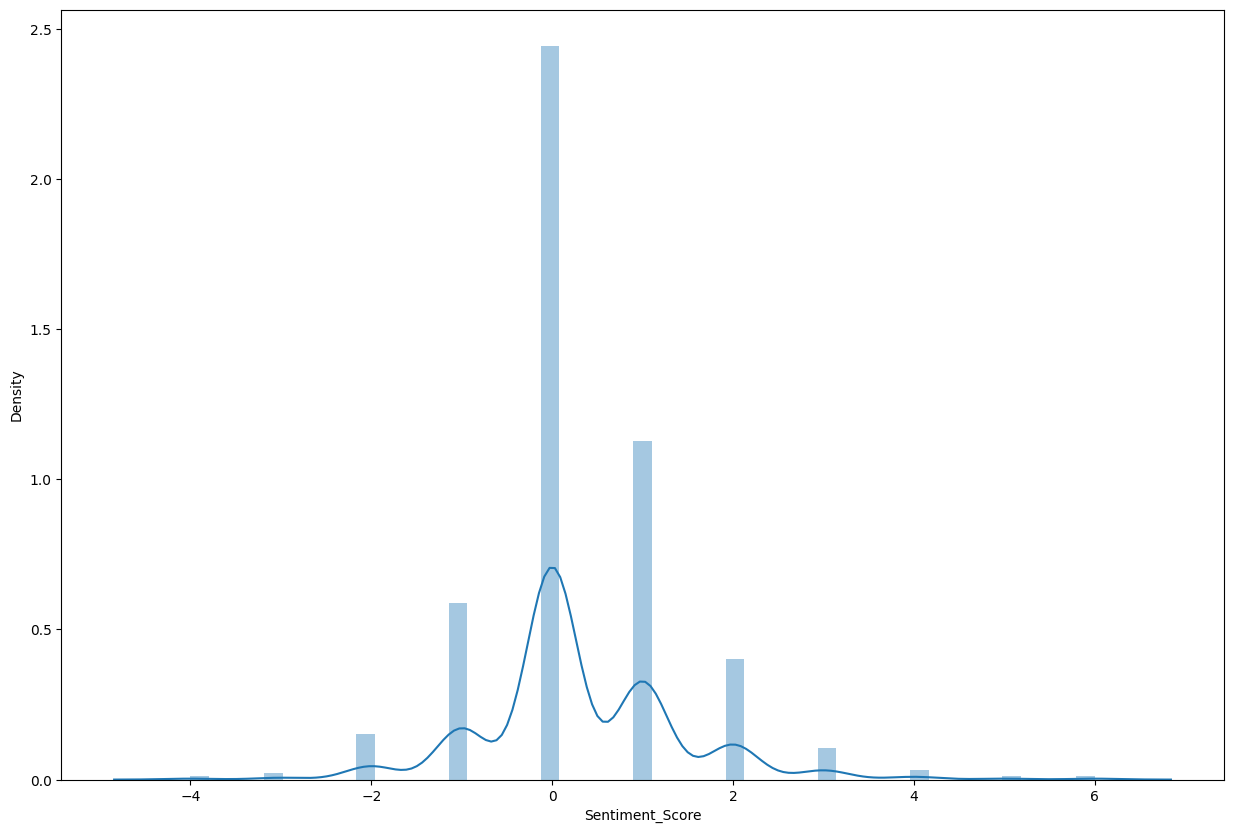

In [172]:
#Distribution plot for the Sentiment Score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,10))
sns.distplot(sent_df['Sentiment_Score'])

<Axes: xlabel='index', ylabel='Sentiment_Score'>

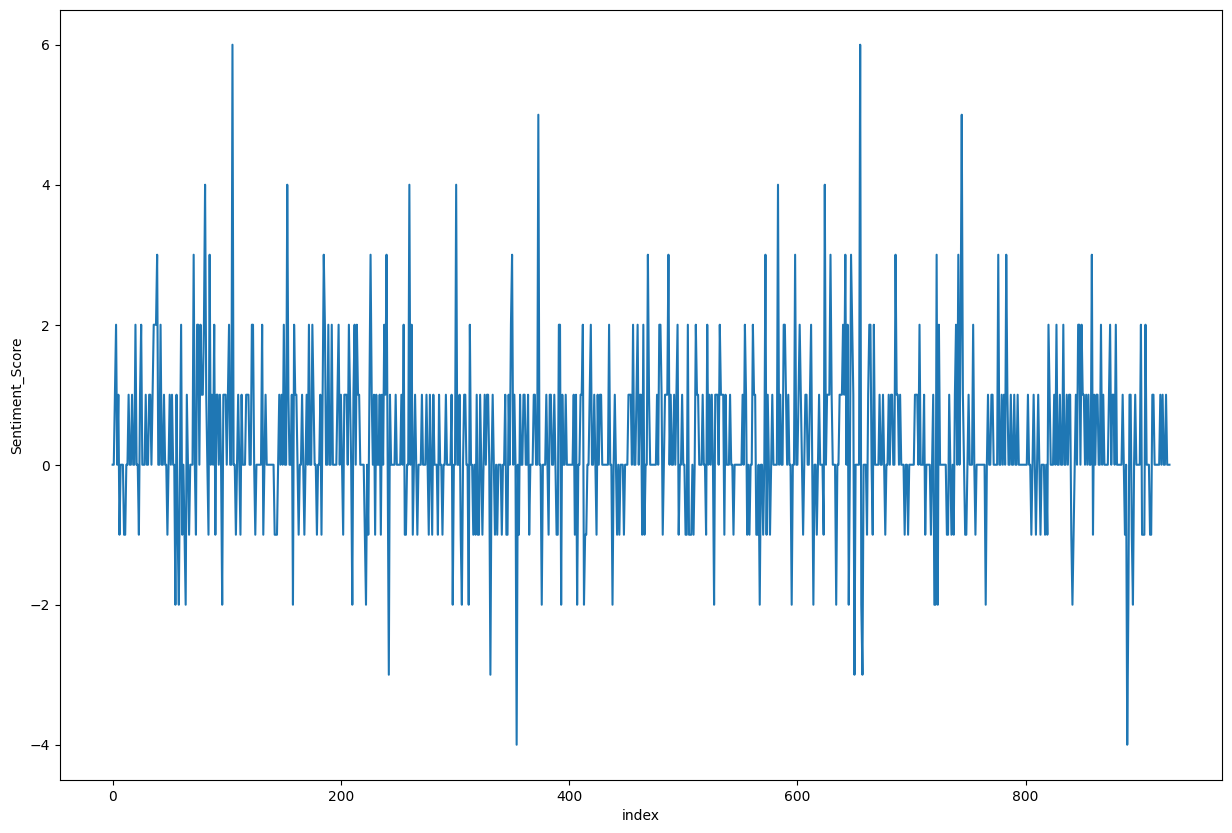

In [173]:
#Line plot of the sentiment Score for the dataset
plt.figure(figsize=(15,10))
sns.lineplot(y= 'Sentiment_Score', x='index', data=sent_df)

<Axes: title={'center': 'Sentence Sentiment Value VS Sentence Word Count'}, xlabel='word_count', ylabel='Sentiment_Score'>

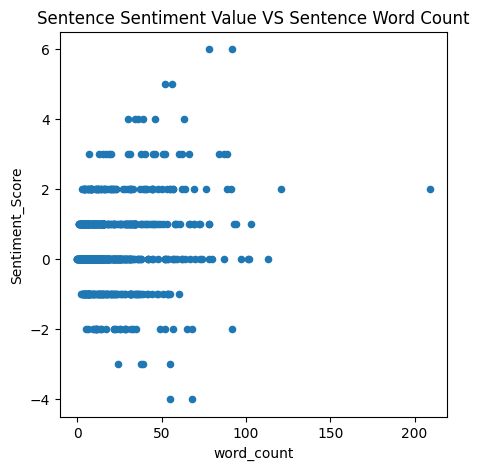

In [174]:
#Scatter plot between the no. of words in the sentence and their Sentiment Score
sent_df.plot.scatter(x='word_count', y= 'Sentiment_Score', figsize=(5,5), title= 'Sentence Sentiment Value VS Sentence Word Count')